# Car Evaluation & Vehicle Sales Analysis

Before you start, install the some of the required packages. 

In [51]:
!python -m pip install kaggle==1.6.12

In [52]:
!pip install --target=/workspace ucimlrepo

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

AS/the dataset i will use Car Evaluation Dataset from the UCI Machine Learning Repository with the Vehicle Sales Dataset sourced from kaggle offers a comprehensive approach to understanding automotive markets. The Car Evaluation Dataset categorizes cars based on attributes like price, maintenance cost, and safety, providing insights into acceptability categories. Meanwhile, the Vehicle Sales Dataset details pricing trends, regional preferences, and market conditions, allowing for analysis of how these attributes influence real-world purchasing decisions. Integrating these datasets enhances our understanding of consumer behavior and market dynamics in the automotive industry, from initial evaluation to final purchase.



Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [44]:
#download ucimlrepo to acsess the dataset
pip install ucimlrepo


In [ ]:
#for visualisation 
!pip install numpy==1.22.4


In [ ]:
!pip install --upgrade matplotlib scipy scikit-image pywavelets opencv-python


In [2]:
#load import library
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import seaborn as sns

#### **Dataset 1**

Type: fetch_ucirepo

Method:Fetched from UCI Machine Learning Repository

Dataset variables: 

**Features (X):**


**buying:** buying price (vhigh, high, med, low)


**maint:** maintenance price (vhigh, high, med, low)


**doors:** number of doors (2, 3, 4, 5more)


**persons:** capacity (2, 4, more)


**lug_boot:** luggage boot size (small, med, big)


**safety:** estimated safety (low, med, high)


**Target Variable (y):** class (car acceptability: unacc, acc, good, vgood)

In [4]:
#get dataset from Programmatically downloading files
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 



{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [5]:
# Convert features to a dataframe to can use later
x_df = pd.DataFrame(X)
y_df=pd.DataFrame(y)


#### Dataset 2

Type:CSV format

Method:Manually downloaded from source kaggle

Dataset variables:

**This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.** and not all colunm need  


https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data?resource=download

In [6]:
df_car=pd.read_csv('vehicles.csv')


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: completeness 

we will now take completeness for a two dataset individually.


first we take a dataset Car Evaluation Dataset  as you see there is no null value in this dataset 

In [9]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [10]:
x_df.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [11]:
y_df.describe()

,class
count,1728
unique,4
top,unacc
freq,1210


as you see the two datafram dosen't contain null value

second dataset is Vehicle Sales Dataset that dataset contain a lot of null value 

In [12]:
#FILL IN - Inspecting the dataframe visually
df_car.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


<Axes: >

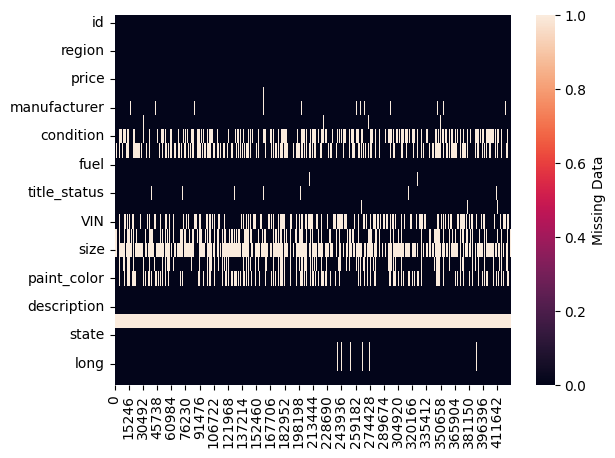

In [13]:

sns.heatmap(df_car.isna().transpose(),
           cbar_kws={'label':'Missing Data'})

In [14]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [15]:
#FILL IN - Inspecting the dataframe programmatically
df_car.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Issue and justification: the dataset contain many null value and have a column without any value.
as you the colunm county conatin zero value that mean if drop it will be fine 

### Quality Issue 2: consistency


in the first dataset the columns number of person and number of the door is i type of string and this not corect it should be intger value  

In [16]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [17]:
x_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


Issue and justification: why i i think this it should be change because if you want to search about persons is 2 and higher is hard to do it in srting but if it was intger it will be easy. and in my opinon there is Tidiness Issue in name of this two colunms is ambiguous.

### Tidiness Issue 1: columns name 

in Car Evaluation Dataset there is two colunm that name is ambiguous persons and doors it should be number of person, number of door 

In [18]:
#FILL IN - Inspecting the dataframe visually
x_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [19]:
#FILL IN - Inspecting the dataframe programmatically
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


Issue and justification: if you wite it like num_person , num_door it will be clean for any one that want read the dataset or deal with it .

### Tidiness Issue 2: Separate Storage of Feature Variables

in Car Evaluation Dataset  there is two dataframe one x and y and it should combin it 

In [20]:
#FILL IN - Inspecting the dataframe visually
x_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [21]:
y_df.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [22]:
#FILL IN - Inspecting the dataframe programmatically
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [23]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


Issue and justification: beacuse it give us good insights for dataset and make it easy to  combin with another dataset 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [24]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
x_copy=x_df.copy()
df_carcopy=df_car.copy()

### **Quality Issue 1: completness**

In [25]:
# FILL IN - Apply the cleaning strategy
df_carcopy = df_carcopy.drop('county', axis=1)

In [26]:
# FILL IN - Validate the cleaning was successful
df_carcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Justification: as you see the colunm county is deleted .

In [27]:
df_carcopy.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


### **Quality Issue 2: consistency**

In [28]:
#FILL IN - Apply the cleaning strategy
x_copy['doors'] = x_copy['doors'].replace('5more', '5')
x_copy['persons'] = x_copy['persons'].replace('more', '5')
# Now convert 'doors' and 'persons' columns to integers
x_copy['doors'] = x_copy['doors'].astype(int)
x_copy['persons'] = x_copy['persons'].astype(int)

In [29]:
#FILL IN - Validate the cleaning was successful
x_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: int64(2), object(4)
memory usage: 81.1+ KB


Justification: the datatype is changing from object to int

### **Tidiness Issue 1:  columns name**

In [30]:
#FILL IN - Apply the cleaning strategy
# Rename columns 'doors' and 'persons' to 'num_doors' and 'num_persons'
x_copy = x_copy.rename(columns={'doors': 'num_doors', 'persons': 'num_persons'})

In [31]:
#FILL IN - Validate the cleaning was successful
x_copy.head()

,buying,maint,num_doors,num_persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


Justification: konw it easy to read the dataset with this change 

### **Tidiness Issue 2: Separate Storage of Feature Variables**

In [32]:
#FILL IN - Apply the cleaning strategy
xy_df = pd.concat([x_copy, y_df], axis=1)

In [33]:
#FILL IN - Validate the cleaning was successful
xy_df.head()

,buying,maint,num_doors,num_persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [34]:
xy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maint        1728 non-null   object
 2   num_doors    1728 non-null   int64 
 3   num_persons  1728 non-null   int64 
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


Justification: know the new datafram have all columns of x and y dataframs

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [35]:
#FILL IN - Remove unnecessary variables and combine datasets
columns_to_remove = ['url', 'region_url', 'image_url', 'description']
df_carcopy_cleaned = df_carcopy.drop(columns=columns_to_remove)

In [36]:
combined_df = pd.concat([df_carcopy_cleaned, xy_df], axis=1)

In [37]:
combined_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,lat,long,posting_date,buying,maint,num_doors,num_persons,lug_boot,safety,class
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,small,low,unacc
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,small,med,unacc
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,small,high,unacc
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,med,low,unacc
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,med,med,unacc


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [38]:
#FILL IN - saving data
# Save the raw data
df_carcopy.to_csv('raw_car_data.csv', index=False)
xy_df.to_csv('raw_xy_data.csv', index=False)

combined_df.to_csv('combined_car_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:**What are the key factors that affect the selling price of used cars, and how do these factors vary by car manufacturer?**

In [39]:
combined_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,lat,long,posting_date,buying,maint,num_doors,num_persons,lug_boot,safety,class
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,small,low,unacc
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,small,med,unacc
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,small,high,unacc
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,med,low,unacc
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,vhigh,vhigh,2.0,2.0,med,med,unacc


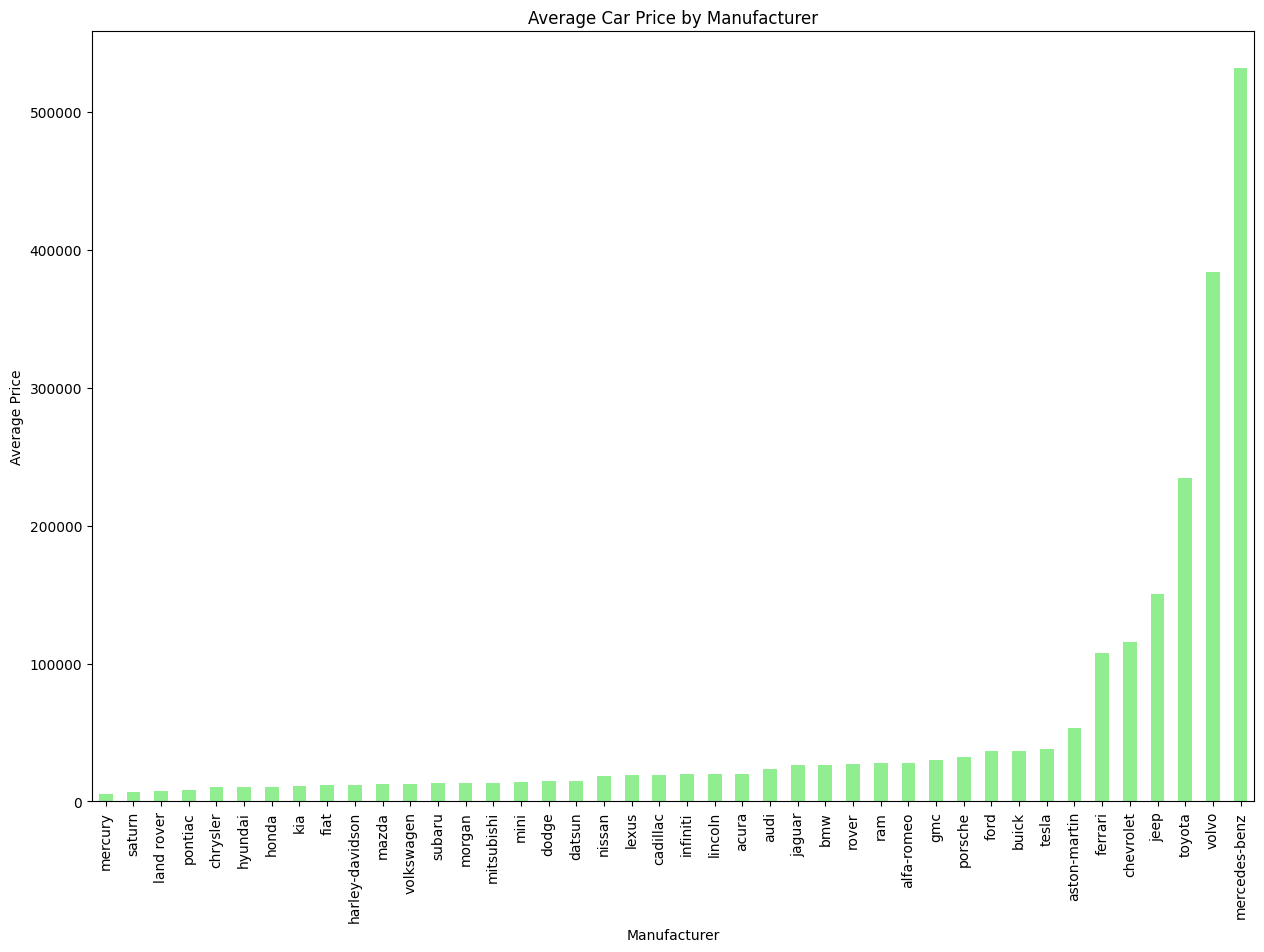

In [43]:
#Visual 1 - Calculate the average price by manufacturer
avg_price_by_manufacturer = combined_df.groupby('manufacturer')['price'].mean().sort_values()

# Plot the average car price by manufacturer
plt.figure(figsize=(15, 10))
avg_price_by_manufacturer.plot(kind='bar', color='lightgreen')
plt.title('Average Car Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


*Answer to research question:the visualization shows the average car price by manufacturer. This helps us understand which manufacturers tend to have higher or lower priced cars in the used car market. For example, mercedes-benz manufactor   show higher average prices compared to more manufactors.


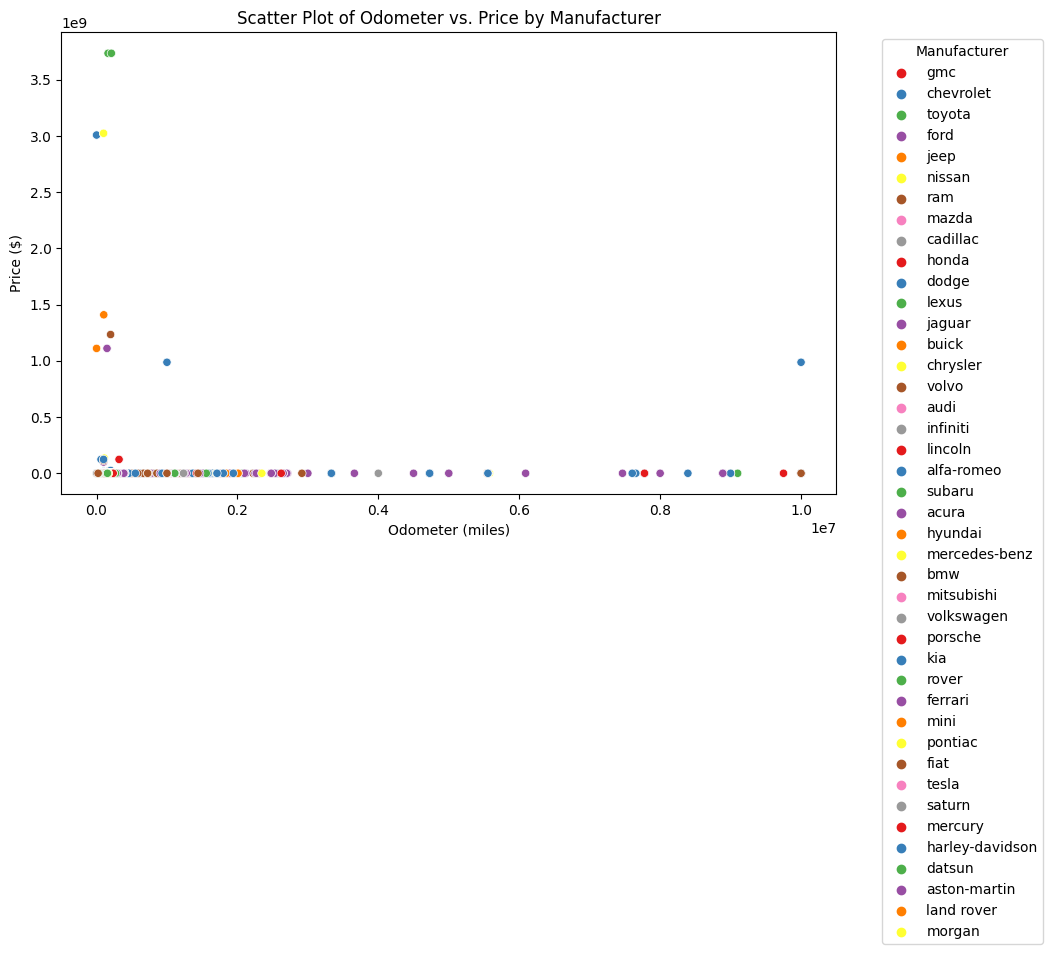

In [42]:
#Visual 2 - Scatter plot of odometer vs. price with trend lines by manufacturer

plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', hue='manufacturer', data=combined_df, palette='Set1')
plt.title('Scatter Plot of Odometer vs. Price by Manufacturer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


*Answer to research question:from this Visual we can see that higher odometer tends to lower the selling price of used cars.



### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* if i have more time for this project i will edit something in the first dataset like column buying 'vhigh' to 'very high' not olny not only this dataset contain many name that is ambiguous i will fix it . and there is many columns that i want to edit and make it more clean . and from questions there are many questions i have for example waht is the most model gaving highst price. 